In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [98]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 10)

# TimeStamp

In [99]:
df = pd.read_csv('repair2.csv', low_memory=False)

In [100]:
df.shape

(13262, 13)

## date 열 특징

In [102]:
df.sort_values(by=['date'], axis=0, ascending=False).head(5)

,caseID,taskID,originator,eventtype,contact,...,EstimatedRepairTime,RepairCode,RepairOK,date,time
859,552,InternRepair,Lex,start,NaN,...,NaN,NaN,NaN,2022-05-14,4:48
858,87,MakeTicket,Dian,complete,NaN,...,NaN,NaN,NaN,2022-05-13,21:05
857,264,FirstContact,Monica,complete,Phone,...,NaN,NaN,NaN,2022-05-12,6:42
856,304,TicketReady,System,complete,NaN,...,NaN,NaN,NaN,2022-05-11,20:00
855,90,InformClientSurvey,System,complete,NaN,...,NaN,NaN,NaN,2022-05-10,10:19


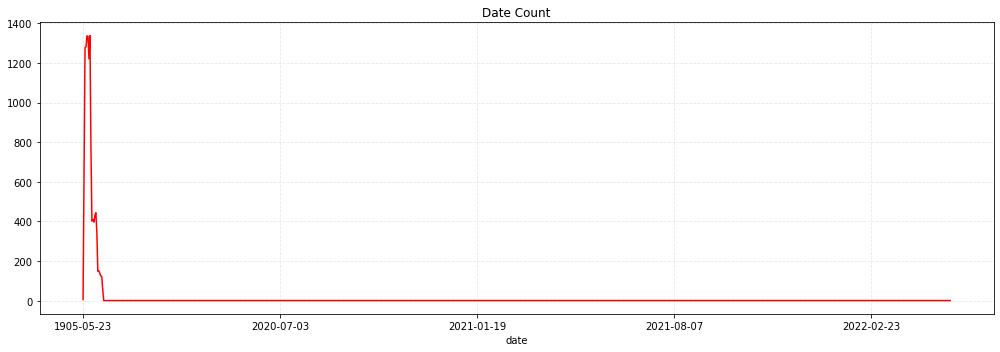

In [103]:
df.groupby('date').size().plot(c='r', figsize=(14,5));
plt.title("Date Count")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

## excel 저장

In [105]:
df.to_excel('repair2.xlsx')

## 분석기간 외 삭제 처리

In [106]:
mask = (df['date'] >= '1970-01-01') & (df['date'] < '2020-01-06')

In [107]:
filtered_df = df.loc[mask]
filtered_df.sort_values(by=['date'], axis=0, ascending=False).head(5)

,caseID,taskID,originator,eventtype,contact,...,EstimatedRepairTime,RepairCode,RepairOK,date,time
3934,617,ReadyInformClient,System,complete,NaN,...,NaN,NaN,True,1970-01-20,6:10
1502,822,SendTicketToFinAdmin,System,complete,NaN,...,NaN,NaN,NaN,1970-01-20,0:19
7881,684,TicketReady,System,complete,NaN,...,NaN,NaN,NaN,1970-01-20,7:20
12012,658,ReadyInformClient,System,complete,NaN,...,NaN,NaN,True,1970-01-20,4:46
6741,111,TicketReady,System,complete,NaN,...,NaN,NaN,NaN,1970-01-20,10:33


## **결측값 처리**

<AxesSubplot:>

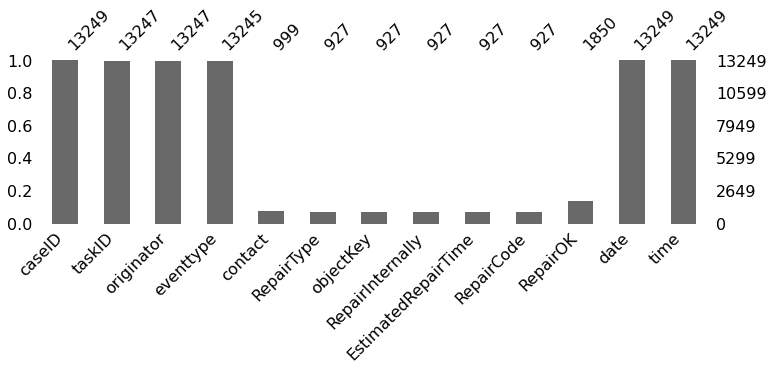

In [113]:
msno.bar(df=df.iloc[:, :], figsize=(12,3))

<AxesSubplot:>

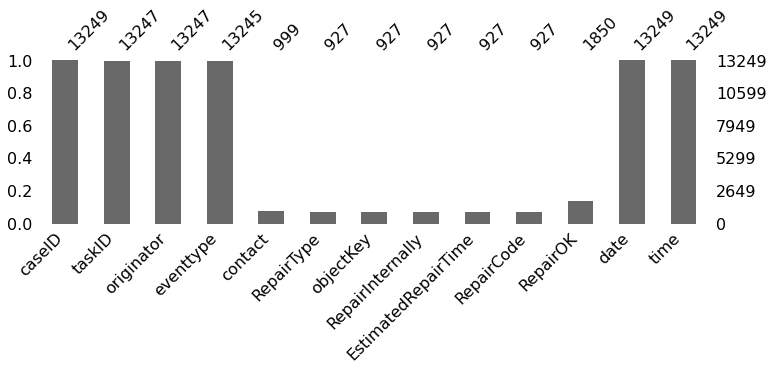

In [112]:
df.dropna(subset=['date', 'time'], inplace=True)
msno.bar(df=df.iloc[:, :], figsize=(12,3))

In [114]:
df.head(2)

,caseID,taskID,originator,eventtype,contact,...,EstimatedRepairTime,RepairCode,RepairOK,date,time
0,419,InformClientSurvey,System,complete,NaN,...,NaN,NaN,NaN,2020-01-06,11:51
1,561,ArrangeSurvey,Monica,complete,NaN,...,NaN,NaN,NaN,2020-01-07,13:48


**새로 저장 후 datetime으로 파싱하여 불러오기**

In [115]:
df.to_csv('repair2_timestamp.csv')

In [116]:
df = pd.read_csv('repair2_timestamp.csv', parse_dates=[['date', 'time']], low_memory=False)

In [118]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.head(2)

,date_time,caseID,taskID,originator,eventtype,...,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,2020-01-06 11:51:00,419,InformClientSurvey,System,complete,...,NaN,NaN,NaN,NaN,NaN
1,2020-01-07 13:48:00,561,ArrangeSurvey,Monica,complete,...,NaN,NaN,NaN,NaN,NaN


In [119]:
# timestamp 오름차순 정렬 + 인덱스 리셋
df.sort_values(by=['date_time'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(5)

,date_time,caseID,taskID,originator,eventtype,...,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
0,1905-05-23,180,MakeTicket,Dian,start,...,NaN,NaN,NaN,NaN,NaN
1,1905-05-23,265,FirstContact,Monica,complete,...,NaN,NaN,NaN,NaN,NaN
2,1905-05-23,1,FirstContact,Dian,complete,...,NaN,NaN,NaN,NaN,NaN
3,1905-05-23,959,TicketReady,System,complete,...,NaN,NaN,NaN,NaN,NaN
4,1905-05-23,318,MakeTicket,Dian,start,...,NaN,NaN,NaN,NaN,NaN


# event type

In [ ]:
for idx, data in refund_df.iterrows():
    try:
        idx = odf[(odf["customer_id"] == data.customer_id) 
                  & (odf["course_title"] == data.course_title) & (odf["type"] == "PAYMENT")
                  ].index[0]
        odf = odf.drop(index=idx)
    except:
        pass

In [ ]:
for idx, data in df.iterrows(): 
    try:
        